### Importing datasets and libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
y6 = pd.read_csv(r'..\datasets\2006.csv') # Imporitng 2006 data
y7 = pd.read_csv(r'..\datasets\2007.csv') # Importing 2007 data

full_set = pd.concat([y6, y7])  # Combining flight data of both years together, 2006 on top of 2007
full_set

In [ ]:
# Importing datasets of airports, carriers and planes

airports = pd.read_csv(r'..\datasets\airports.csv')
carriers = pd.read_csv(r'..\datasets\carriers.csv')
planedata = pd.read_csv(r'..\datasets\plane-data.csv')

### Cleaning the data

In [ ]:
pd.isnull(full_set).sum(axis=0) # Looking for NA values in flight dataset

In [ ]:
# Removing null values in "ArrTime" column 

fullset1 = full_set.dropna(axis=0, subset= ["ArrTime"], how='any') 
pd.isnull(fullset1).sum(axis=0)

In [ ]:
fullset1 = fullset1.dropna(axis=1, how='any') # Removing columns with any null values

In [ ]:
# Confirming all null values are removed

pd.isnull(fullset1).sum(axis=0)

In [ ]:
# Repeating process for other datasets

airports1 = airports.dropna(axis=0, how='any')
carriers1 = carriers.dropna(axis=0, how ='any' )
planedata1 = planedata.dropna(axis=0, how='any')

In [ ]:
# Confirming all null values are removed

pd.isnull(airports1).sum(axis=0)

In [ ]:
pd.isnull(carriers1).sum(axis=0)

In [ ]:
pd.isnull(planedata1).sum(axis=0)

### Exporting cleaned datasets

In [ ]:
airports1.to_csv('../datasets/airports cleaned.csv')
planedata1.to_csv('../datasets/plane data cleaned.csv')
carriers1.to_csv('../datasets/carriers cleaned.csv')

fullset1.to_csv('../datasets/fullset cleaned.csv')

## Q1: When is the best time of day, day of the week, and time of year to fly to minimise delays?

## <font color=green> Best time of year to fly: </font>

In [2]:
fullset = pd.read_csv('../datasets/fullset cleaned.csv') # Importing cleaned data

#Subsetting flights by "DepDelay" column to answer Q1
Q1 = fullset[["Year","Month","DayofMonth","DayOfWeek","CRSDepTime","DepDelay"]]

### Data Wrangling

In [3]:
#Creating a dummy variable 'Delayed' where flights delayed for more than 15mins are given '1' and '0' otherwise

Q1['Delayed'] = np.where(Q1["DepDelay"] > 15, 1, 0) 

In [4]:
#Subsetting to get percentage of flights delayed per month

yearly = Q1[['Year','Month','Delayed']]
count = yearly.groupby(['Year','Month']).count() #getting the count of flights per month
sums = yearly.groupby(['Year','Month']).sum() #getting the number of delays per month into 'Delayed' column

In [5]:
#getting percentage of flights delayed per month into a new column

sums['percDelayed'] = (sums['Delayed']/count['Delayed'])*100 
sums['percDelayed'] = round(sums['percDelayed'],1)

sums = sums.reset_index()
yearly = sums[['Year','Month','percDelayed']]

#Separating the percentages by Year
year06 = yearly[yearly['Year'] == 2006]
year07 = yearly[yearly['Year'] == 2007]

### Visualizing

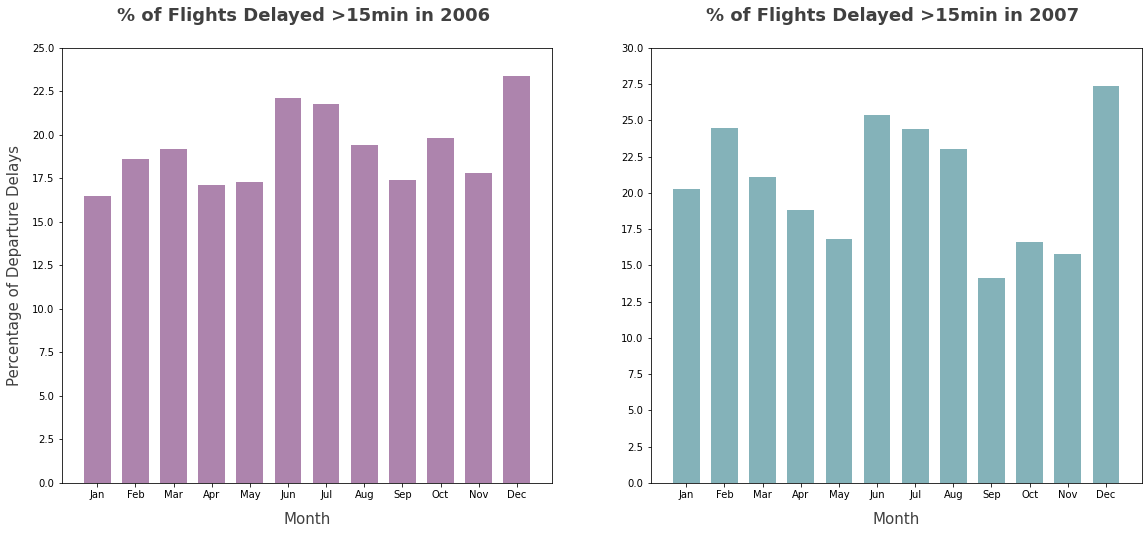

In [7]:
# Column Plot
fig, ax = plt.subplots(1, 2, figsize = (20, 8))

# Plot 1

ax[0].bar(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], 
          year06['percDelayed'],
          alpha = 0.8, 
          width = 0.7,
          color='#996699')

ax[0].set_ylabel('Percentage of Departure Delays',
                 color='#404040',
                 size = 15,
                 labelpad=10)
ax[0].set_xlabel('Month',
                 color='#404040',
                 size = 15,
                 labelpad=12)
ax[0].set_title("% of Flights Delayed >15min in 2006 \n",
                color='#404040',
                size = 18,
                weight = 'bold')
ax[0].set_yticks([ 0., 2.5,  5.,7.5, 10.,12.5, 15.,17.5, 20.,22.5, 25.])


# Plot 2

ax[1].bar(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], 
          year07['percDelayed'],
          alpha = 0.8, 
          width = 0.7,
          color='#669fa8')

ax[1].set_xlabel('Month',
                 color='#404040',
                 size = 15,
                 labelpad=12)
ax[1].set_title("% of Flights Delayed >15min in 2007 \n",
                color='#404040',
                size = 18,
                weight = 'bold')
ax[1].set_yticks([ 0., 2.5,  5.,7.5, 10.,12.5, 15.,17.5, 20.,22.5, 25.,27.5,30.])

plt.subplots_adjust(left=0.15)

plt.savefig('Delays in a Year.png')

## <font color=green> Best time of day and best day of week to fly: </font>

### Data Wrangling

In [8]:
#Converting departure times to string format keeping only hours (removing minutes) to check for best hour of day

daily = Q1[['CRSDepTime','Delayed']]

Hours = Q1.CRSDepTime.astype(str).str[:-2]

#Setting the empty entries in Hours to 00 (12am)
Hours[Hours == ""]= '0'

daily['CRSDepTime']= Hours

daily

,CRSDepTime,Delayed
0,7,0
1,10,0
2,19,0
3,17,0
4,8,0
...,...,...
14279085,16,0
14279086,18,0
14279087,10,0
14279088,13,1


In [9]:
# Getting percentage of journeys that were delayed in each hour in a day

sums2 = daily.groupby(['CRSDepTime']).sum().reset_index()
count2 = daily.groupby(['CRSDepTime']).count().reset_index()

sums2['Delayed'] = (sums2['Delayed']/count2['Delayed'])*100
daily = sums2

In [10]:
daily = daily.reindex([0,1,12,17,18,19,20,21,22,23,2,3,4,5,6,7,8,9,10,11,13,14,15,16]).reset_index(drop=True) #reordering hours index
daily = daily.rename(columns ={'CRSDepTime':'Hour of Day'})

In [11]:
daily = daily.set_index(['Hour of Day']) #resetting index

In [12]:
#Renaming numbers into their corresponding weekdays

weekly = Q1[['DayOfWeek','Delayed']]

def fix_day(day):
    if day == 1 :
        day = "Monday"
    elif day == 2 :
        day = "Tuesday"
    elif day == 3 :
        day = "Wednesday"
    elif day == 4 :
        day = "Thursday"
    elif day == 5 :
        day = "Friday"
    elif day == 6 :
        day = "Saturday"
    elif day == 7 :
        day = "Sunday"
    else:
        day = day
    return day

weekly['DayOfWeek'] = weekly.apply(lambda x: fix_day(x['DayOfWeek']), axis=1)
weekly


,DayOfWeek,Delayed
0,Wednesday,0
1,Wednesday,0
2,Wednesday,0
3,Wednesday,0
4,Wednesday,0
...,...,...
14279085,Saturday,0
14279086,Saturday,0
14279087,Saturday,0
14279088,Saturday,1


In [13]:
# Getting percentage of delays/day

sums3 = weekly.groupby(['DayOfWeek']).sum().reset_index()
count3 = weekly.groupby(['DayOfWeek']).count().reset_index()

sums3['Delayed'] = (sums3['Delayed']/count3['Delayed'])*100
weekly = sums3

weekly = weekly.reindex([3,1,5,6,4,0,2]).reset_index(drop=True)
weekly

,DayOfWeek,Delayed
0,Sunday,20.474279
1,Monday,20.394067
2,Tuesday,17.249109
3,Wednesday,18.662189
4,Thursday,21.674178
5,Friday,23.307535
6,Saturday,17.563735


### Visualizing

Text(0.5, 1.0, 'Pattern of DepDelays in a Week \n')

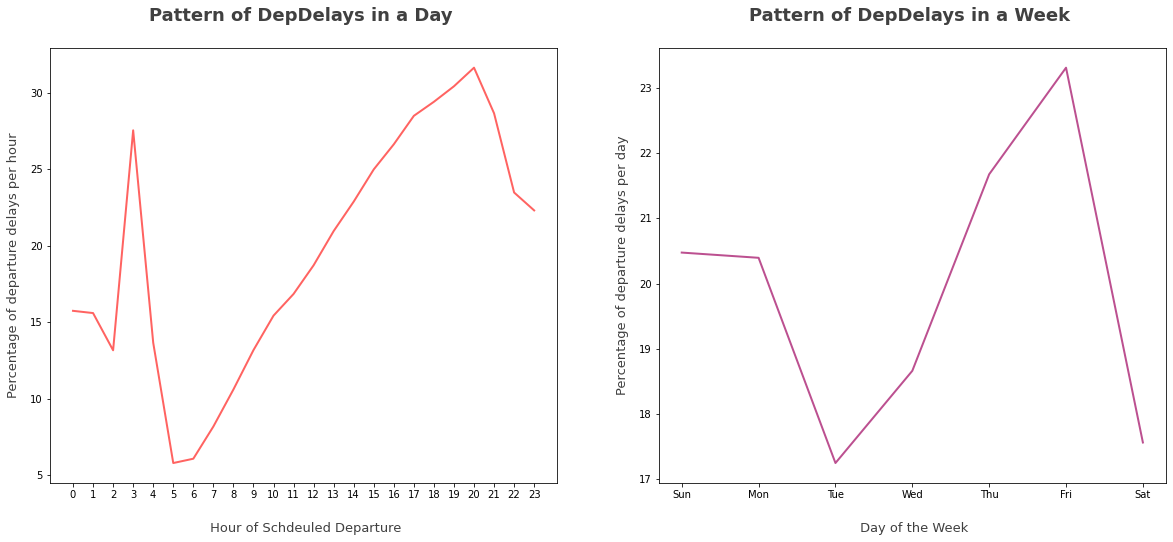

In [14]:
fig, ax=plt.subplots(1,2, figsize=(20,8))

#Left Plot

ax[0].plot([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23],
       daily['Delayed'],
       color = '#ff6361',
       linewidth=2)

ax[0].set_ylabel('Percentage of departure delays per hour',
                 color='#404040',
                 size = 13,
                 labelpad=10)
ax[0].set_xlabel('\n Hour of Schdeuled Departure',
                 color='#404040',
                 size = 13,
                 labelpad=7)
ax[0].set_title("Pattern of DepDelays in a Day \n",
                color='#404040',
                size = 18,
                weight = 'bold')
ax[0].set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])

#Right Plot

ax[1].plot(['Sun', 'Mon','Tue','Wed', 'Thu', 'Fri', 'Sat'],
       weekly['Delayed'],
       color = '#bc5090',
       linewidth=2)

ax[1].set_xlabel('\n Day of the Week',
                 color='#404040',
                 size = 13,
                 labelpad=7)

ax[1].set_ylabel('Percentage of departure delays per day',
                 color='#404040',
                 size = 13,
                 labelpad=10)

ax[1].set_title("Pattern of DepDelays in a Week \n",
                color='#404040',
                size = 18,
                weight = 'bold')

plt.savefig('Daily and Weekly delays.png')